In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot
import matplotlib
matplotlib.style.use('seaborn')
matplotlib.rc('axes', grid=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import lore
from my_app.models.product_popularity import Keras
model = Keras.load()

my_app in development on montanalow@IC-C02PR0MMG8WQ


/Users/montanalow/.pyenv/versions/3.6.4/envs/my_app/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/montanalow/.pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


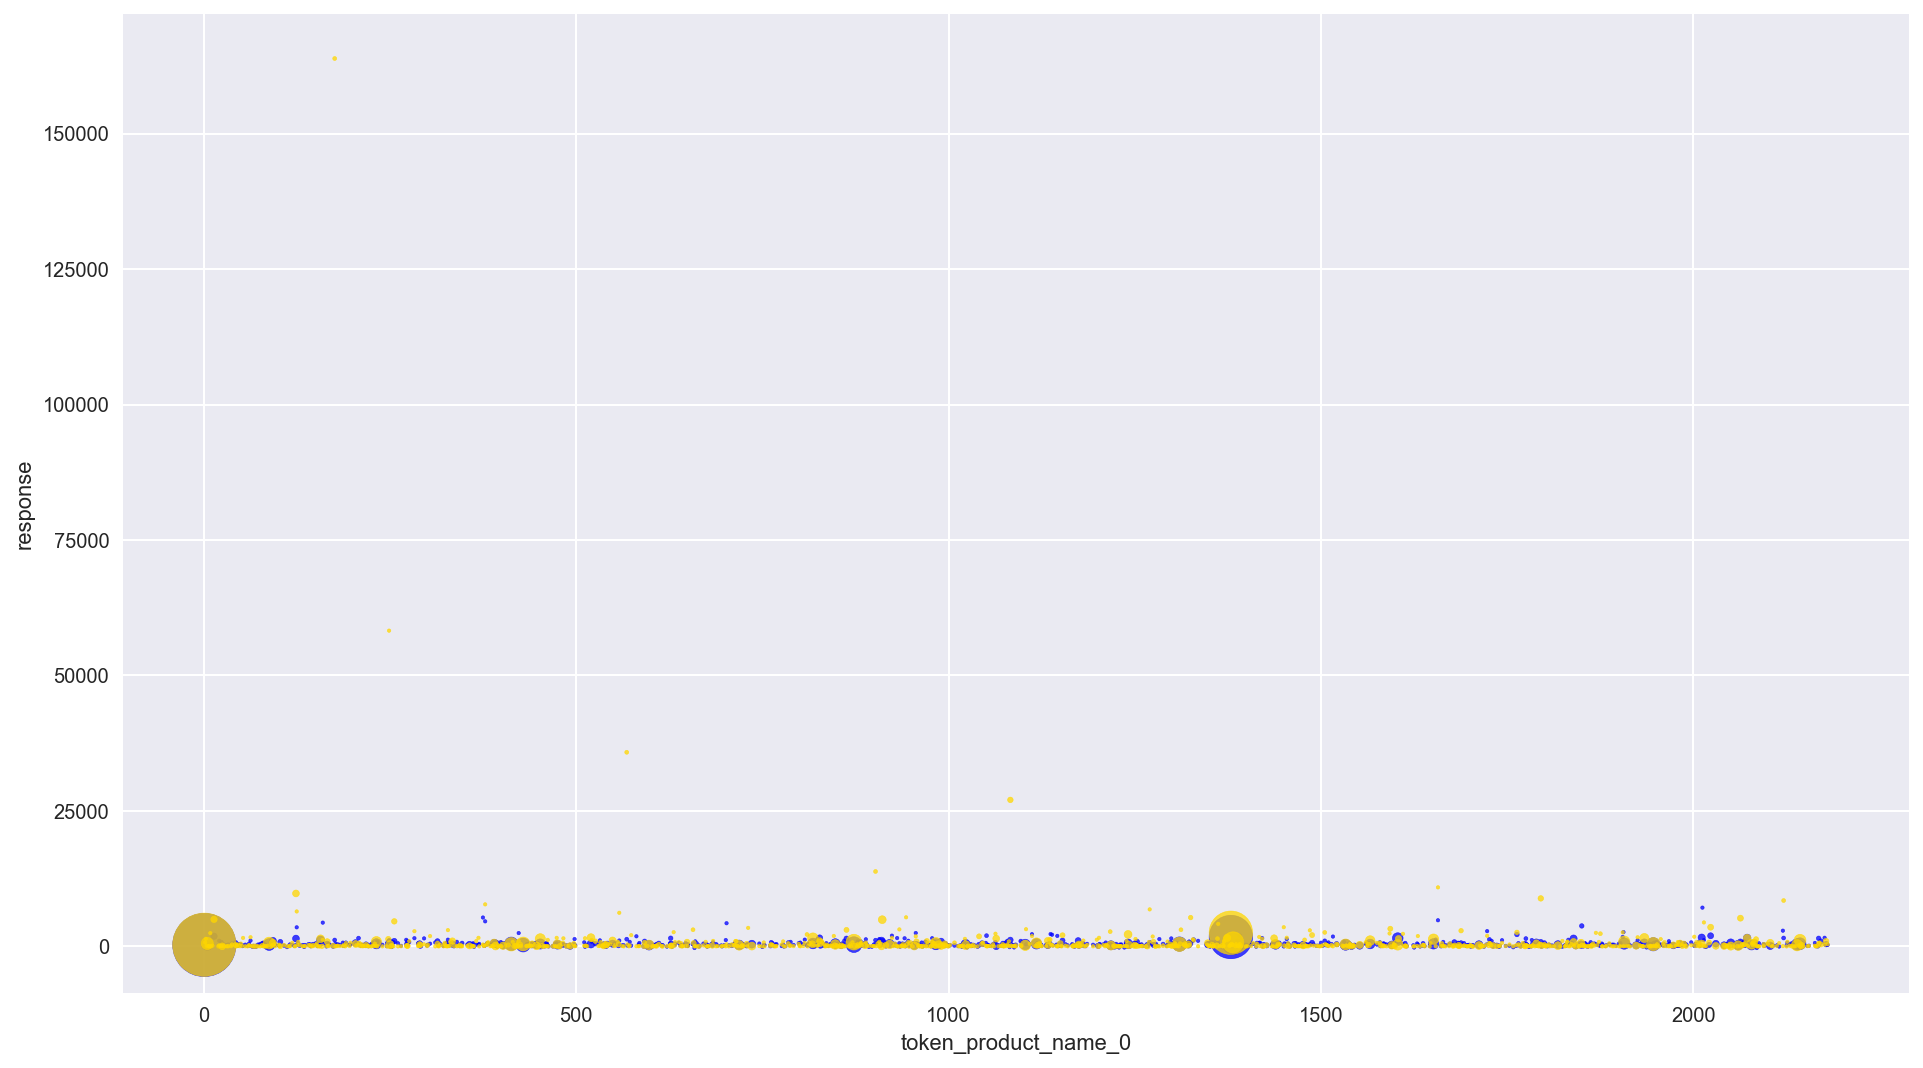

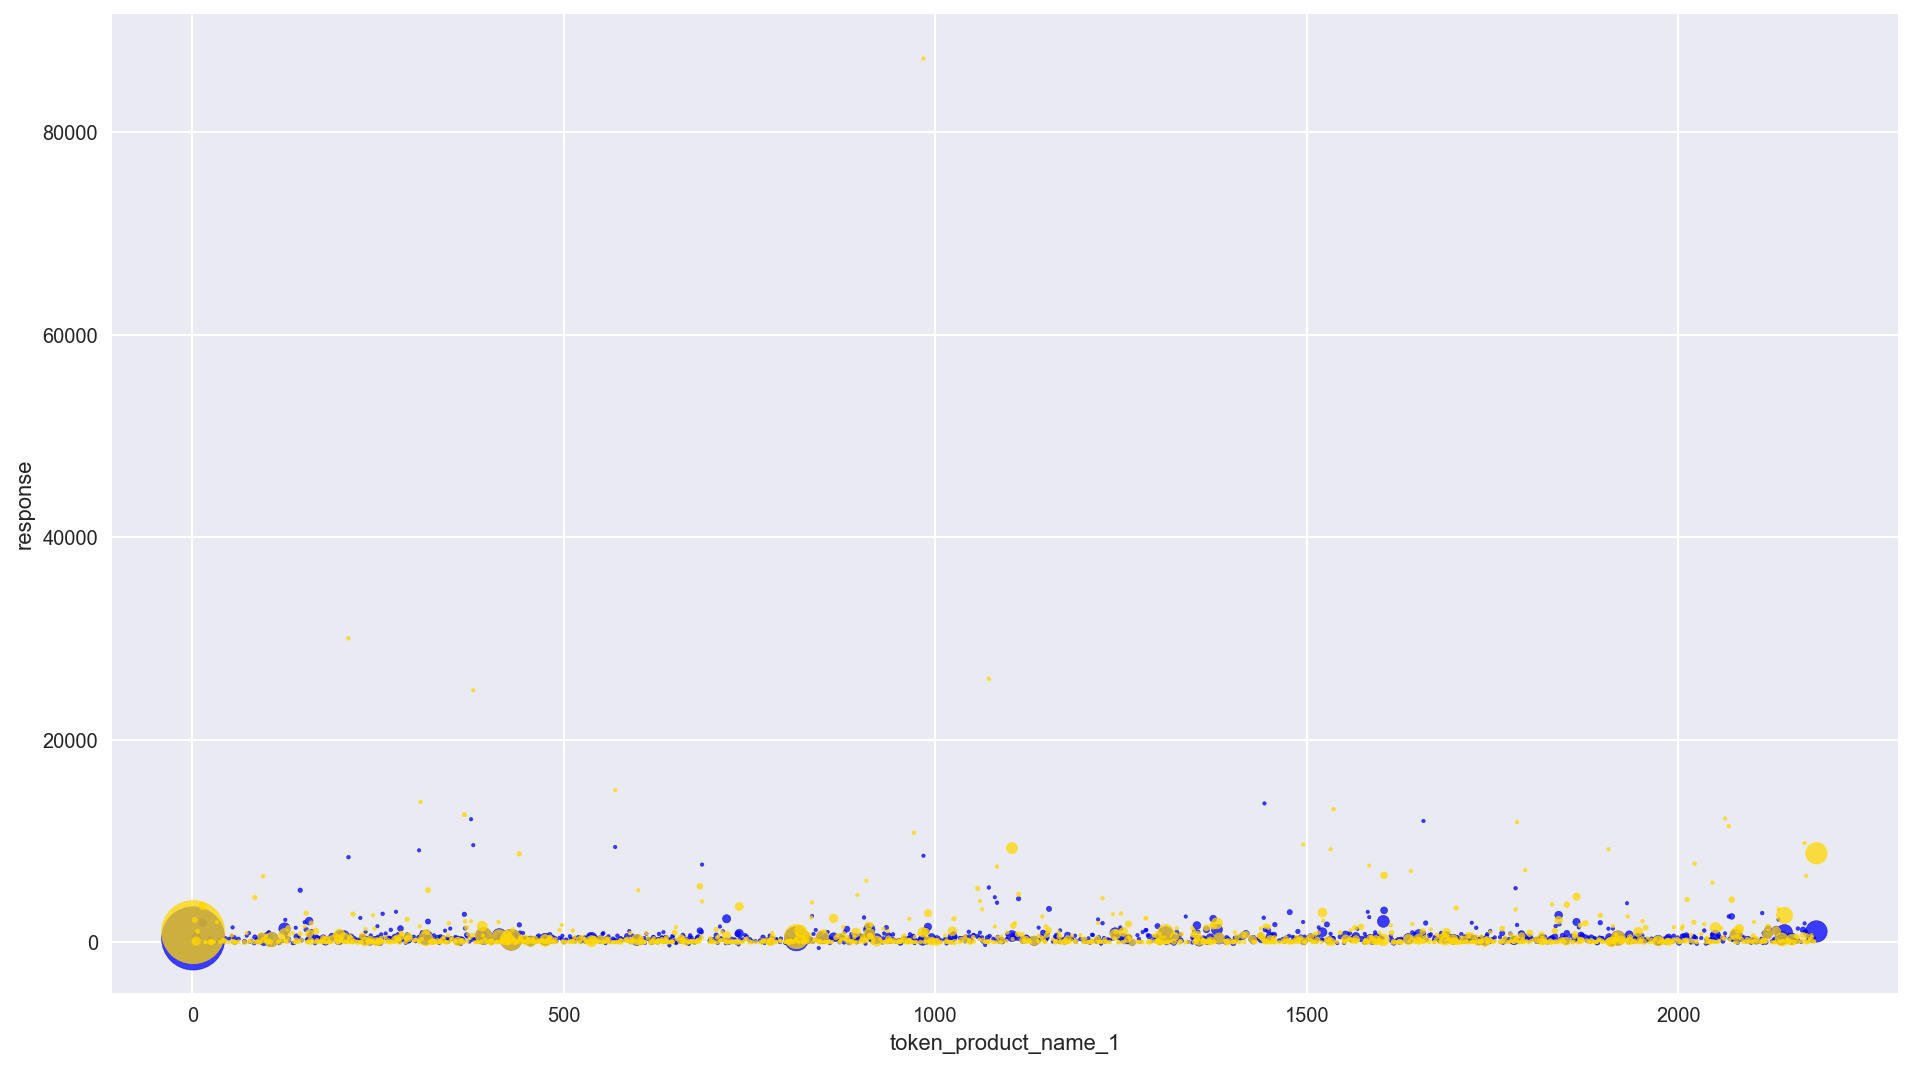

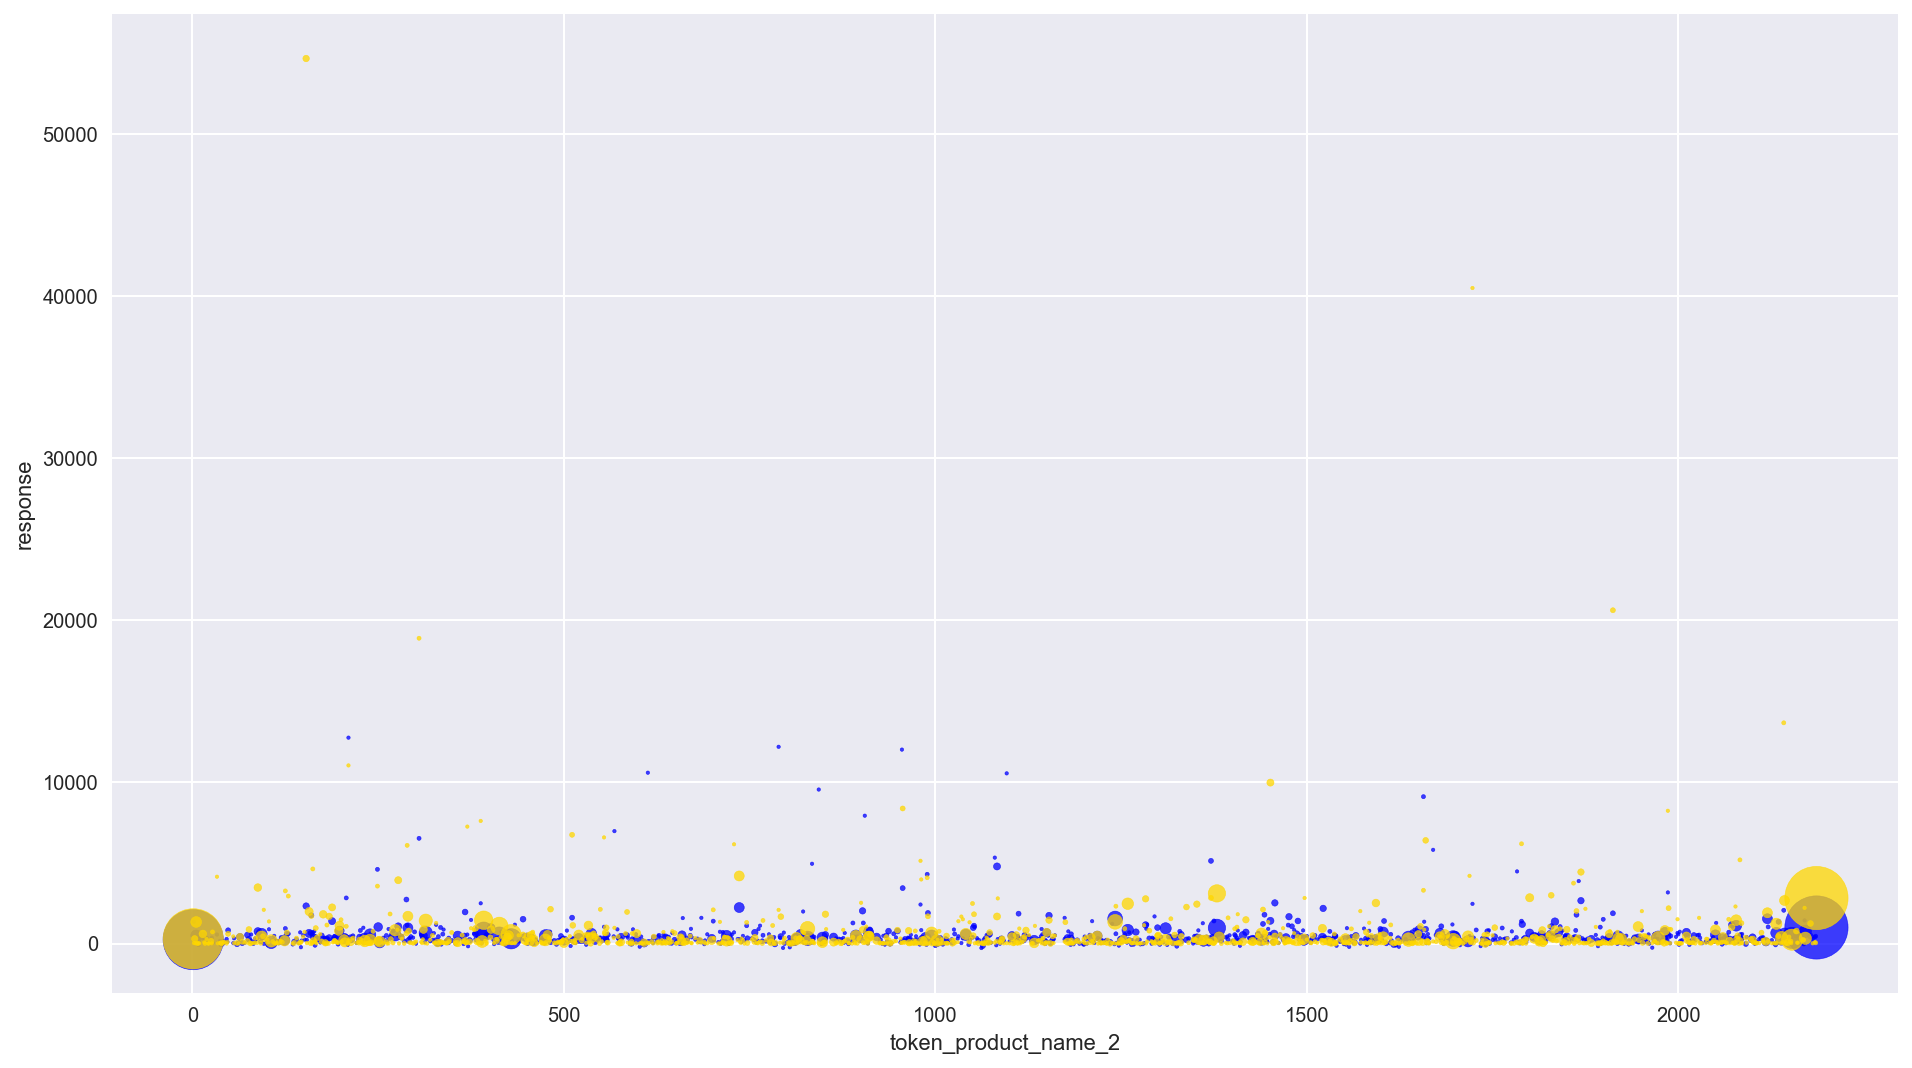

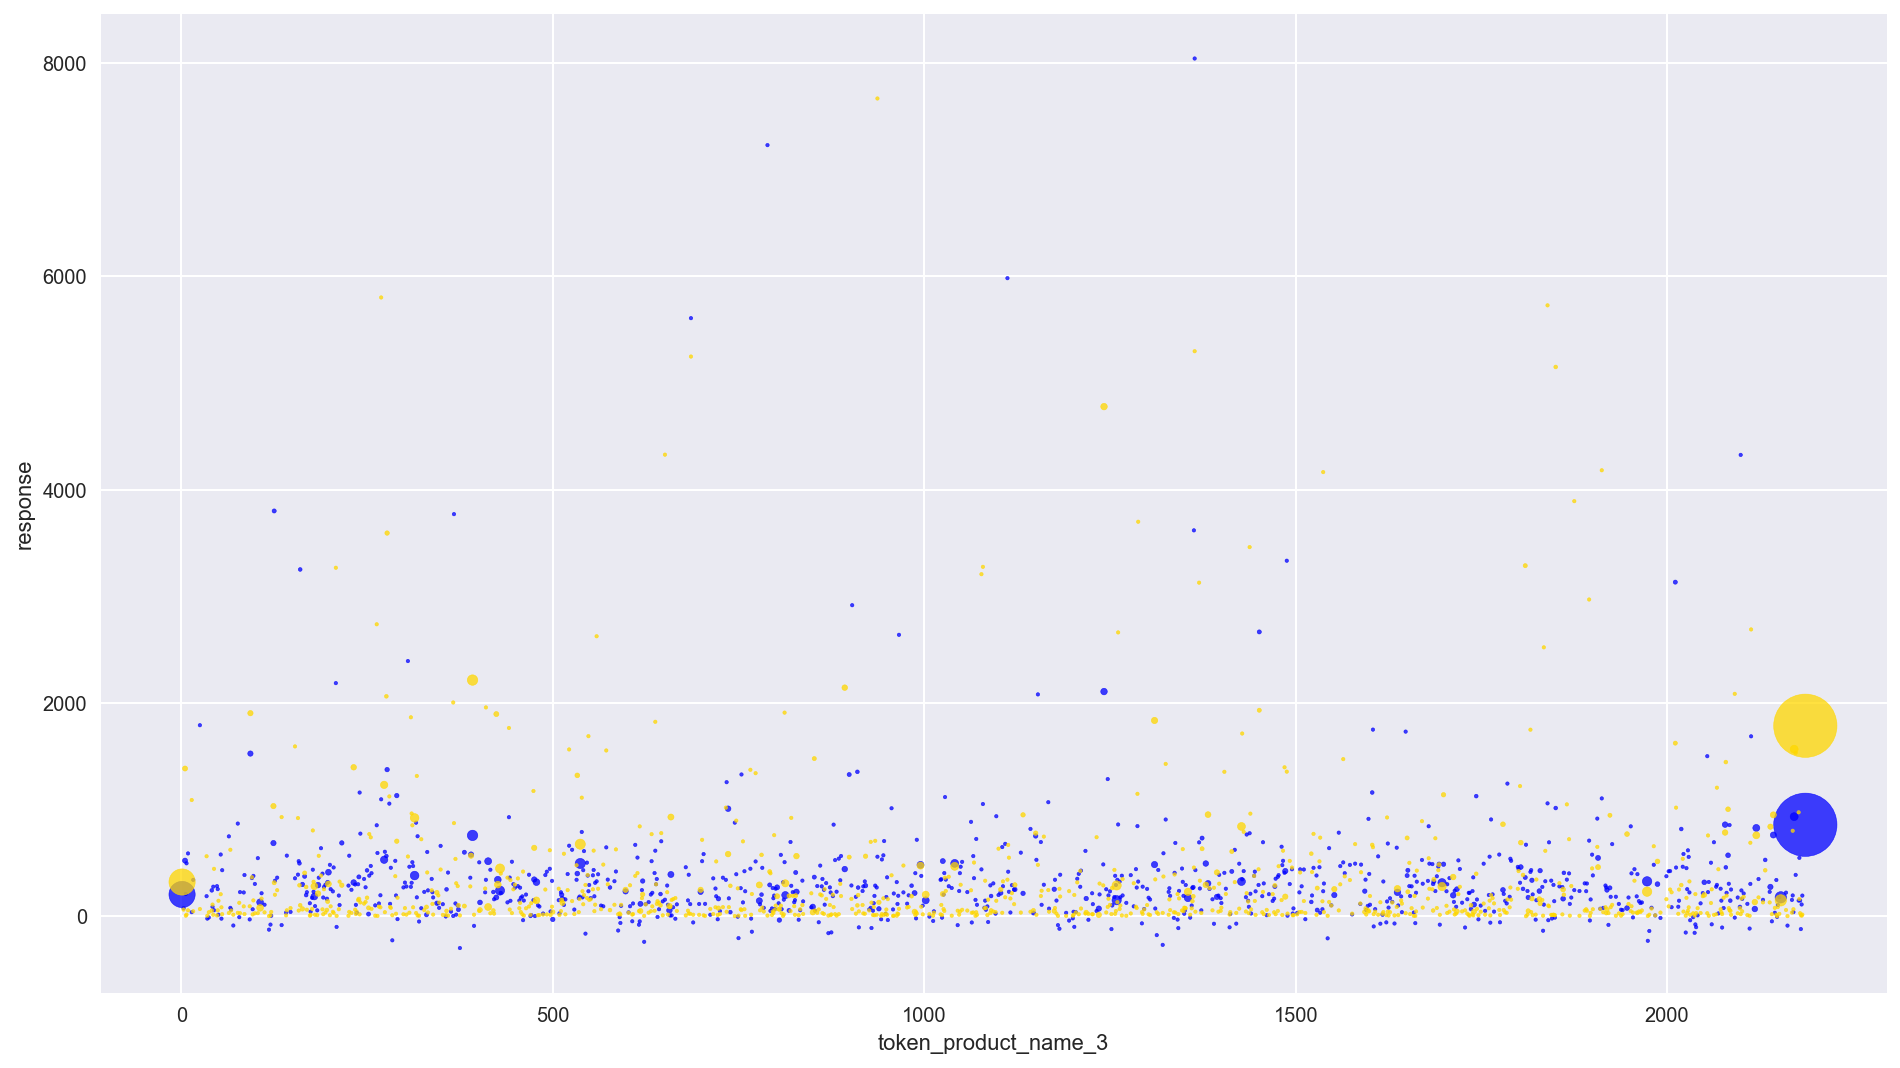

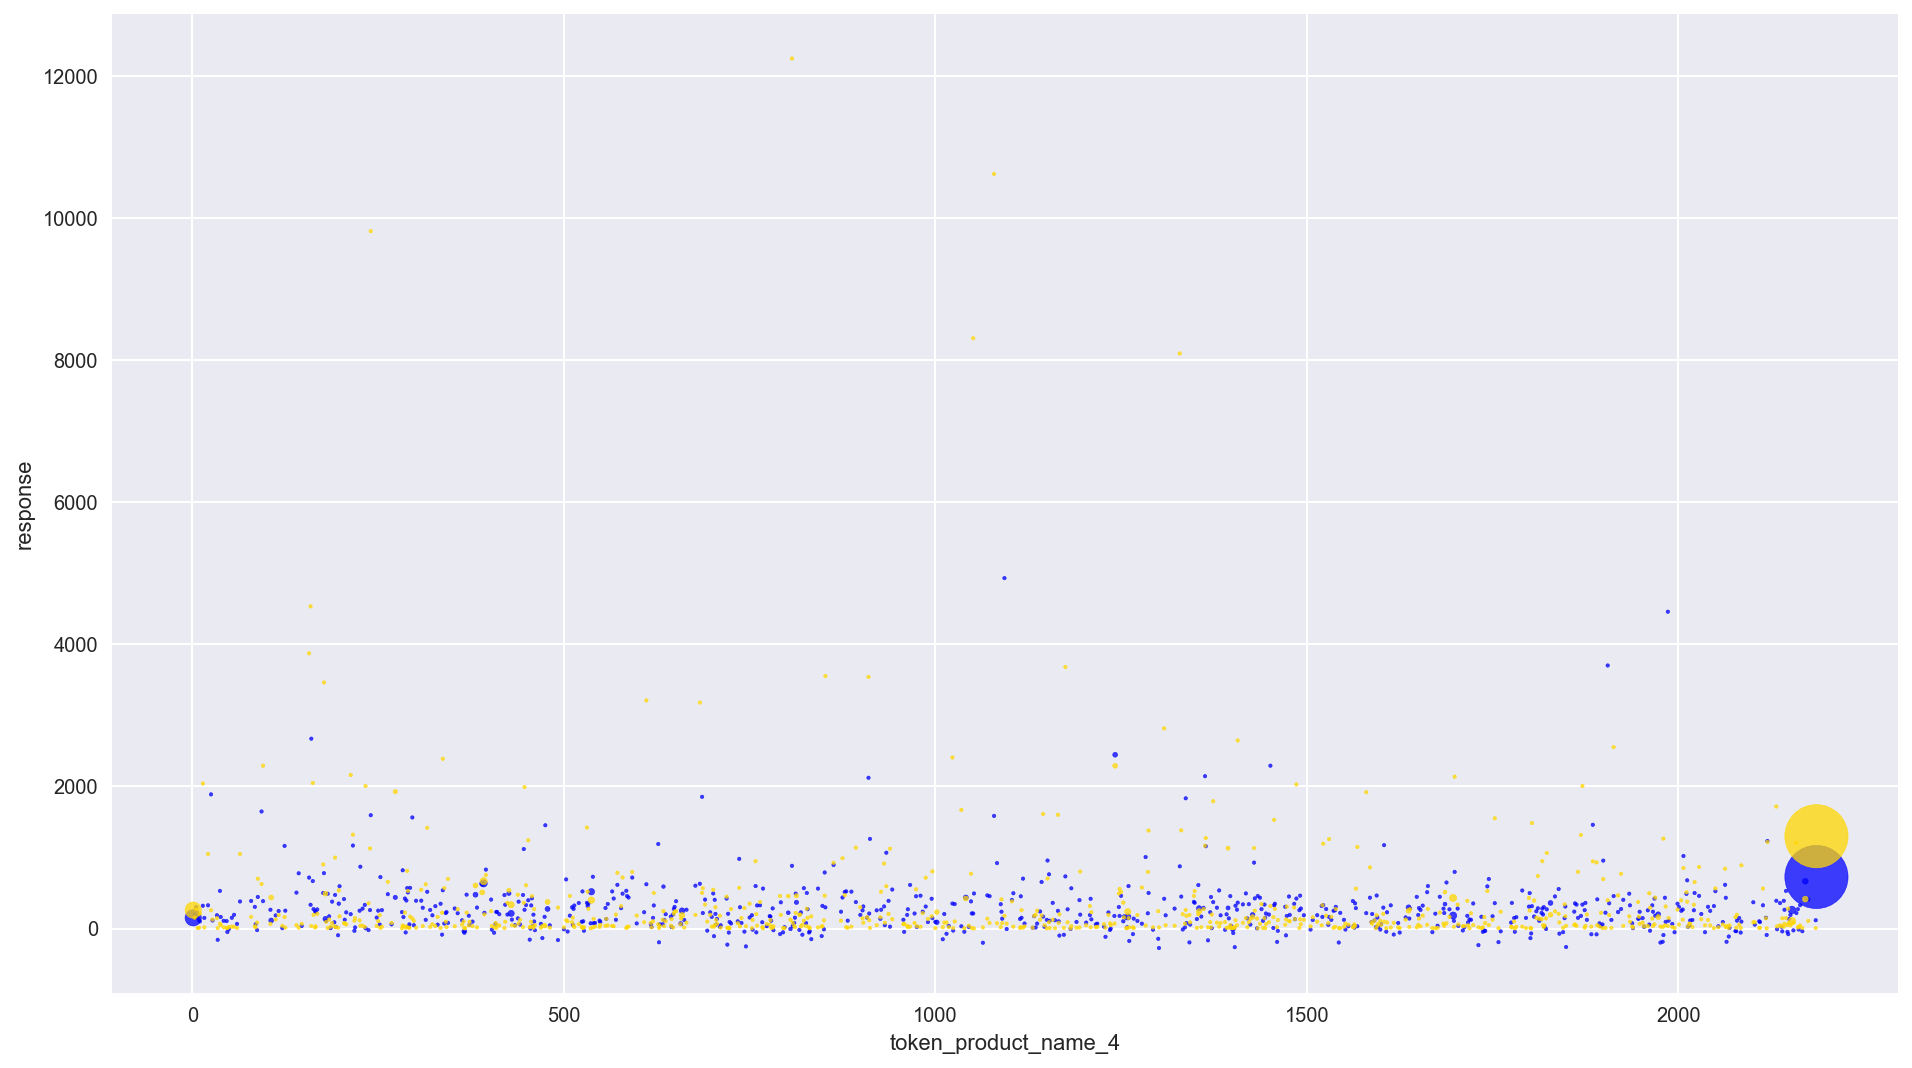

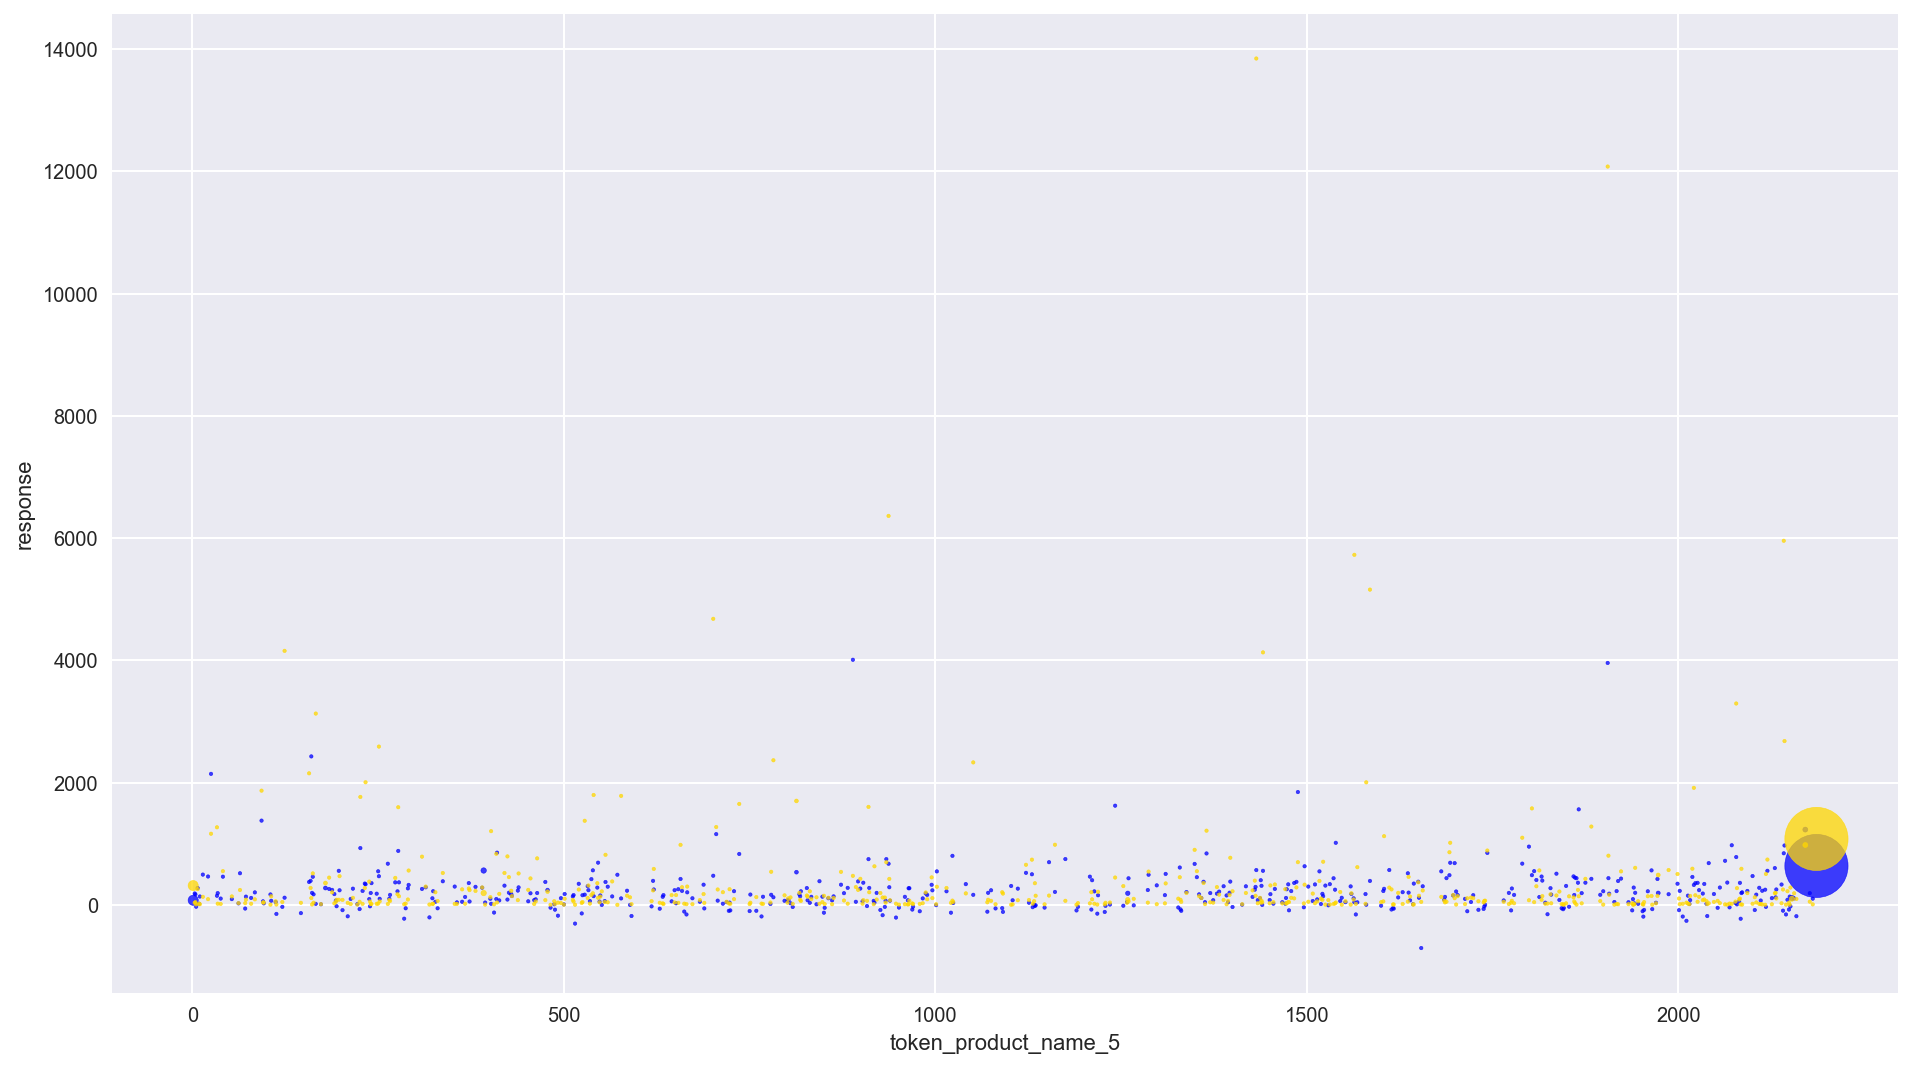

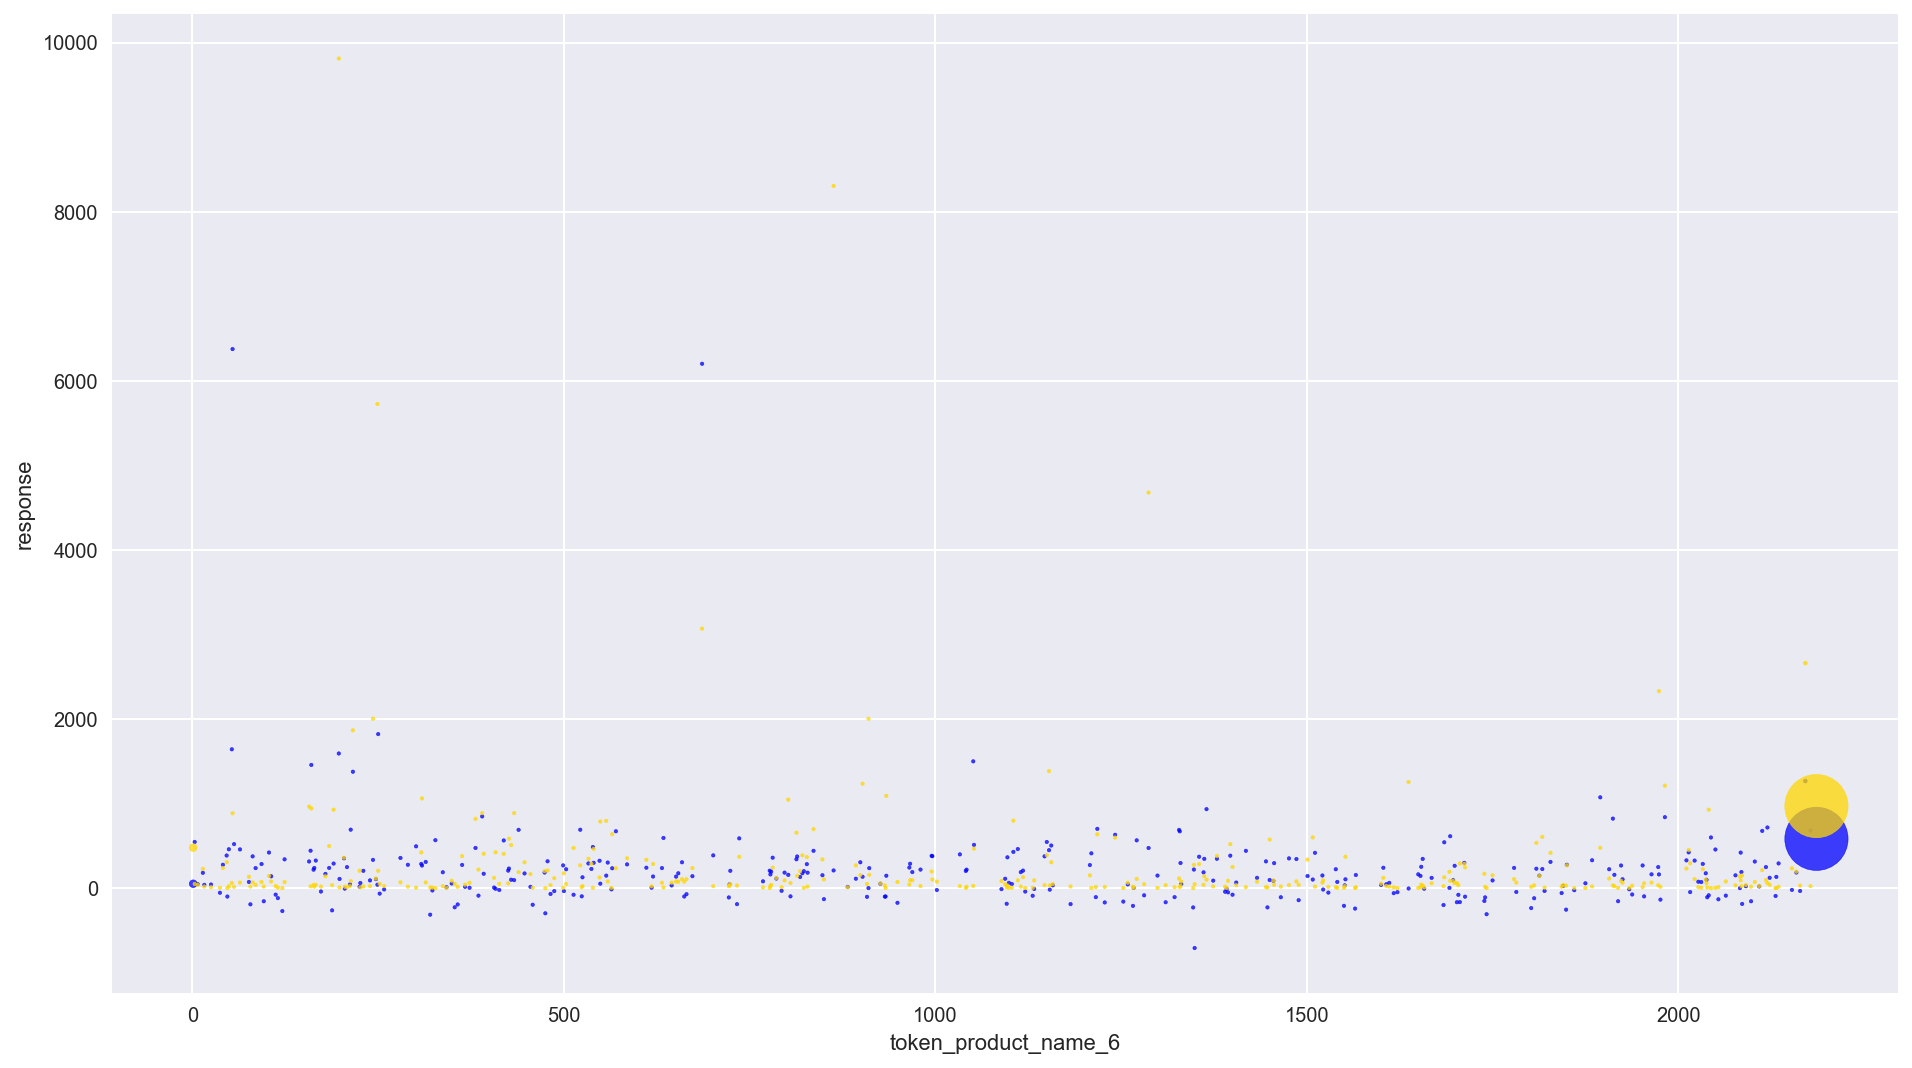

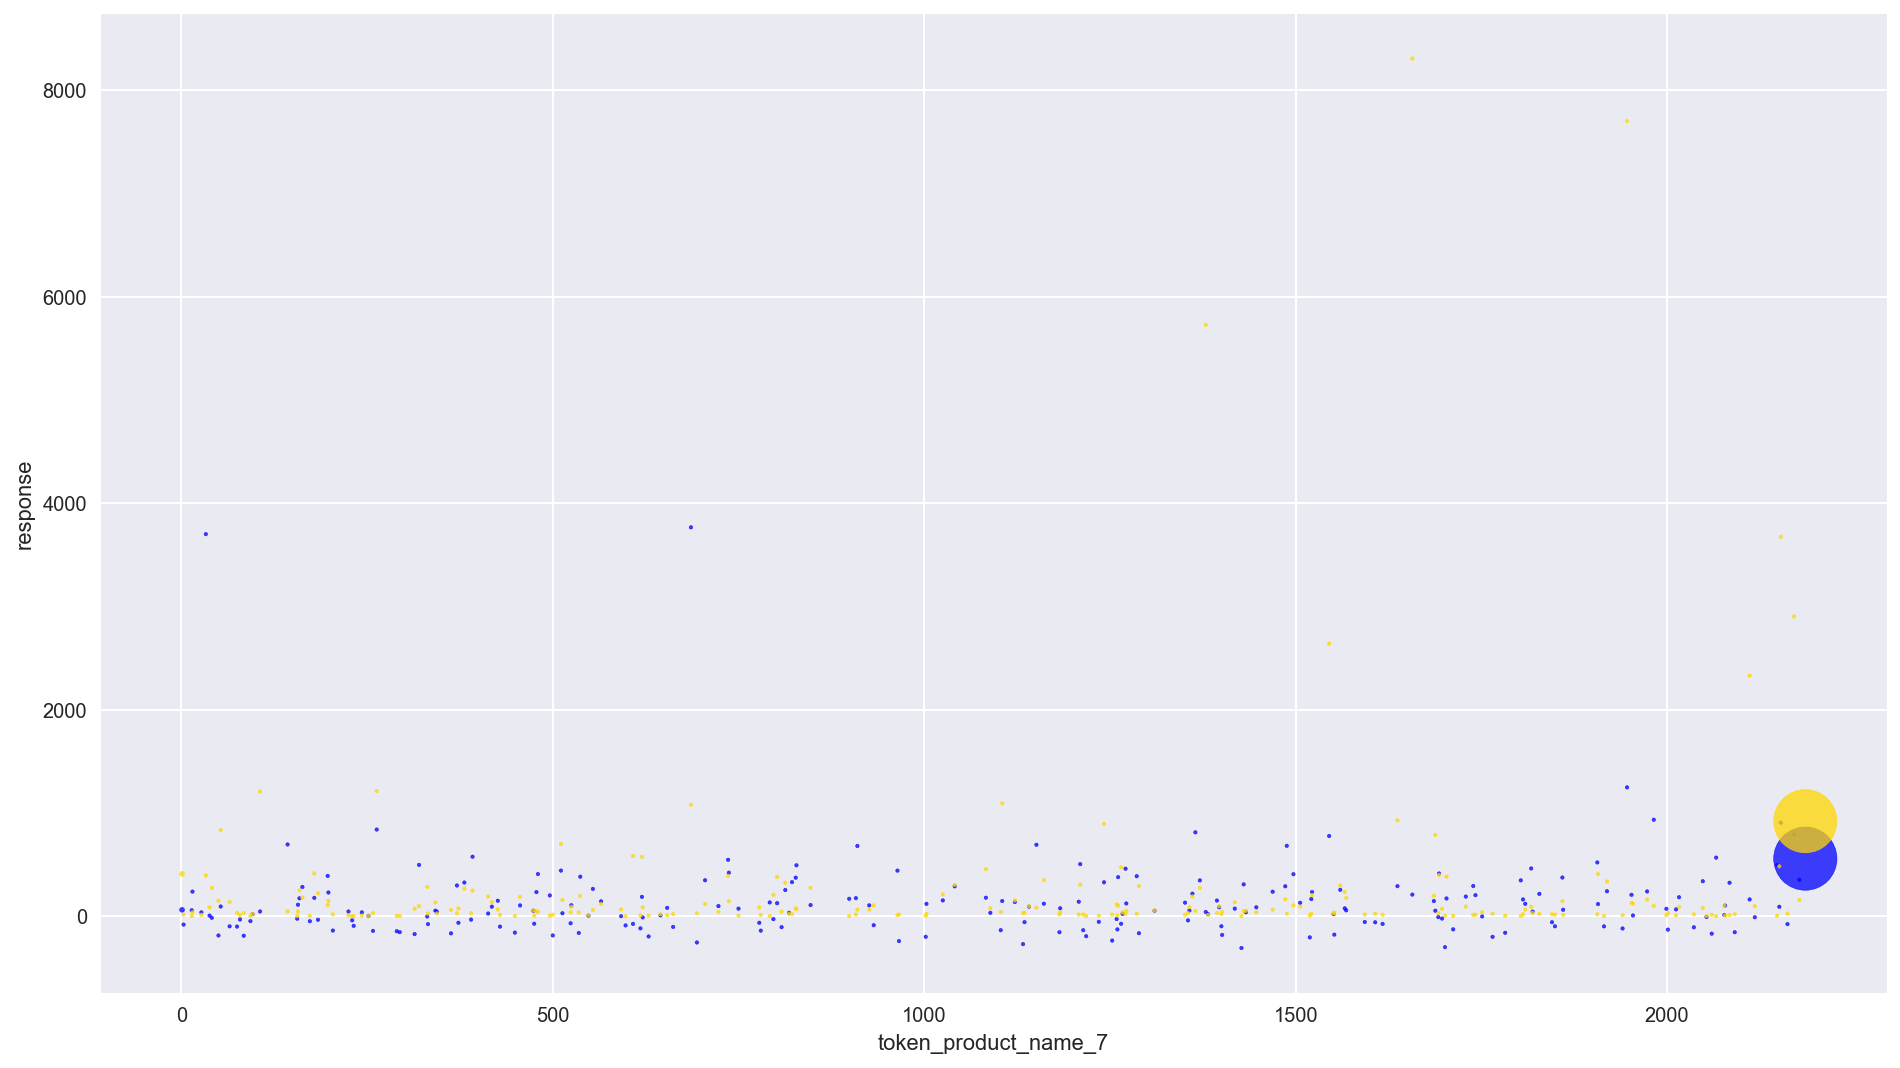

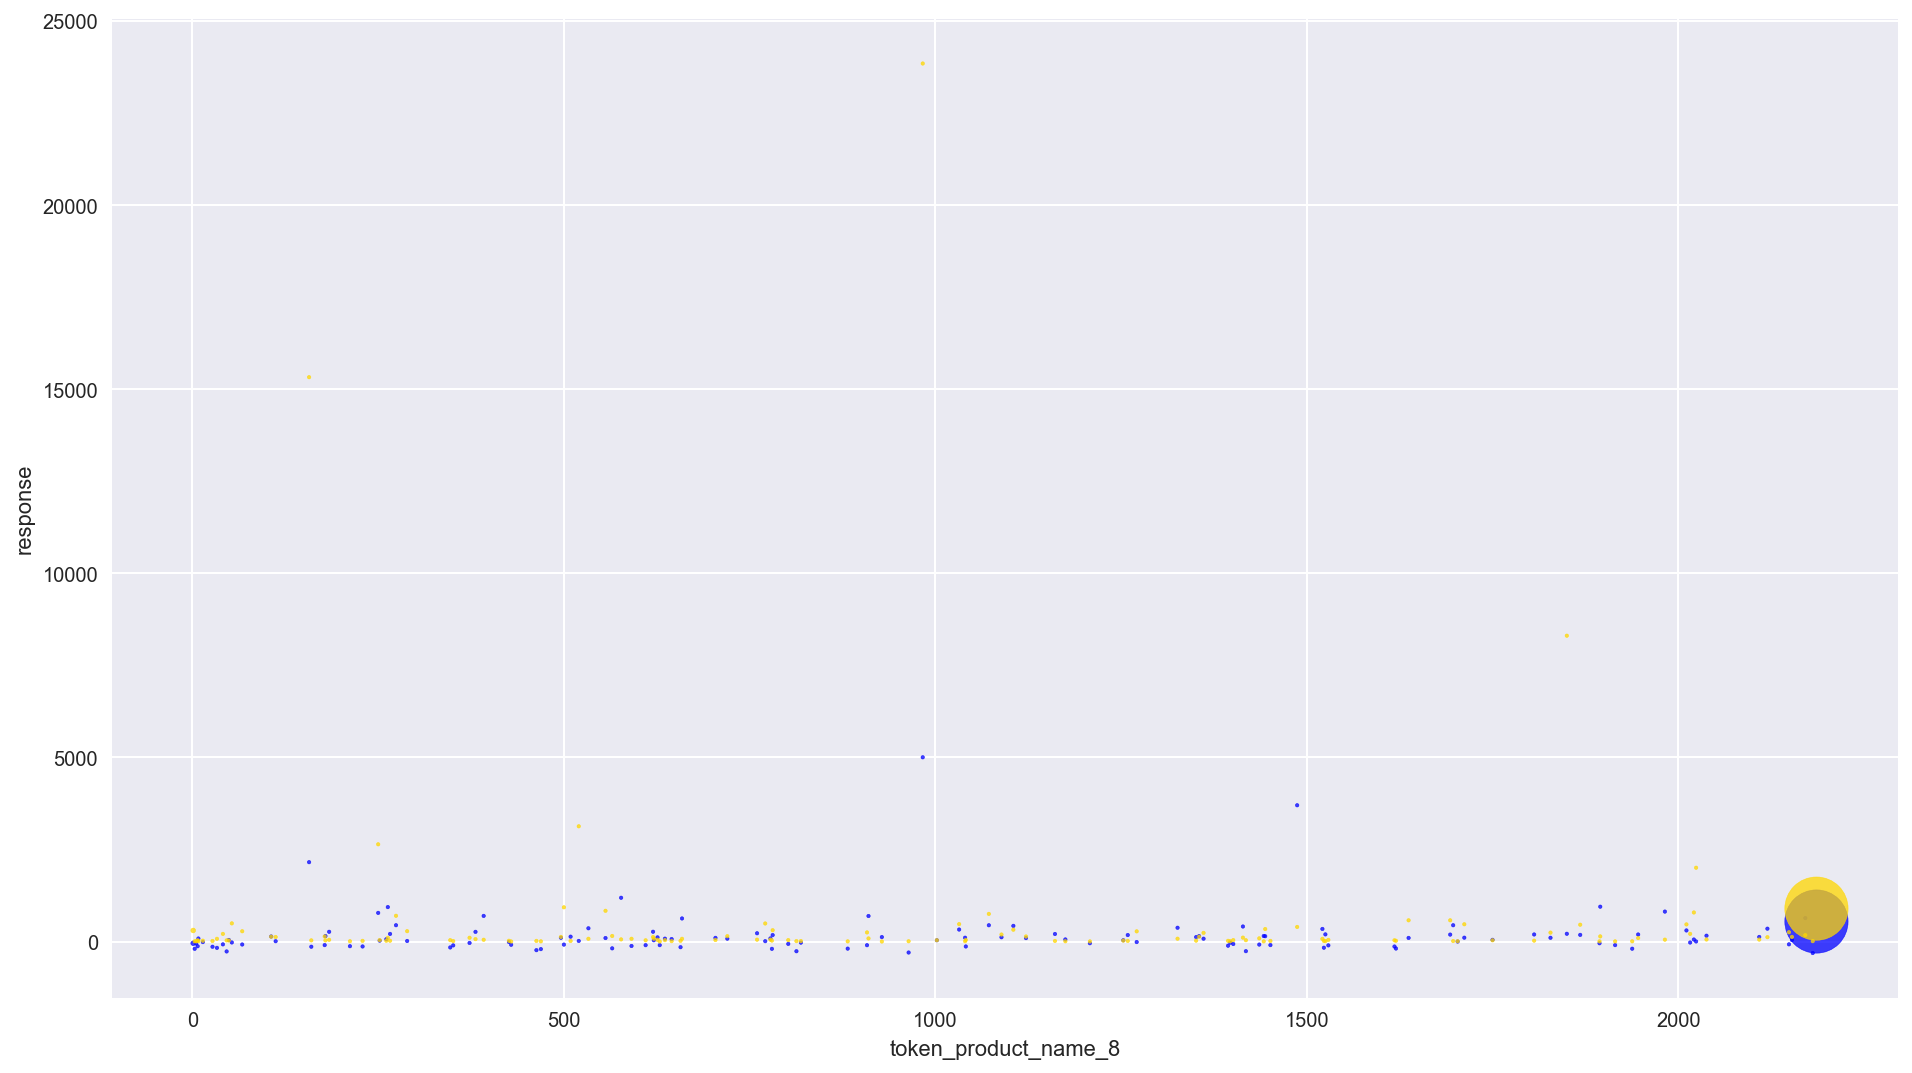

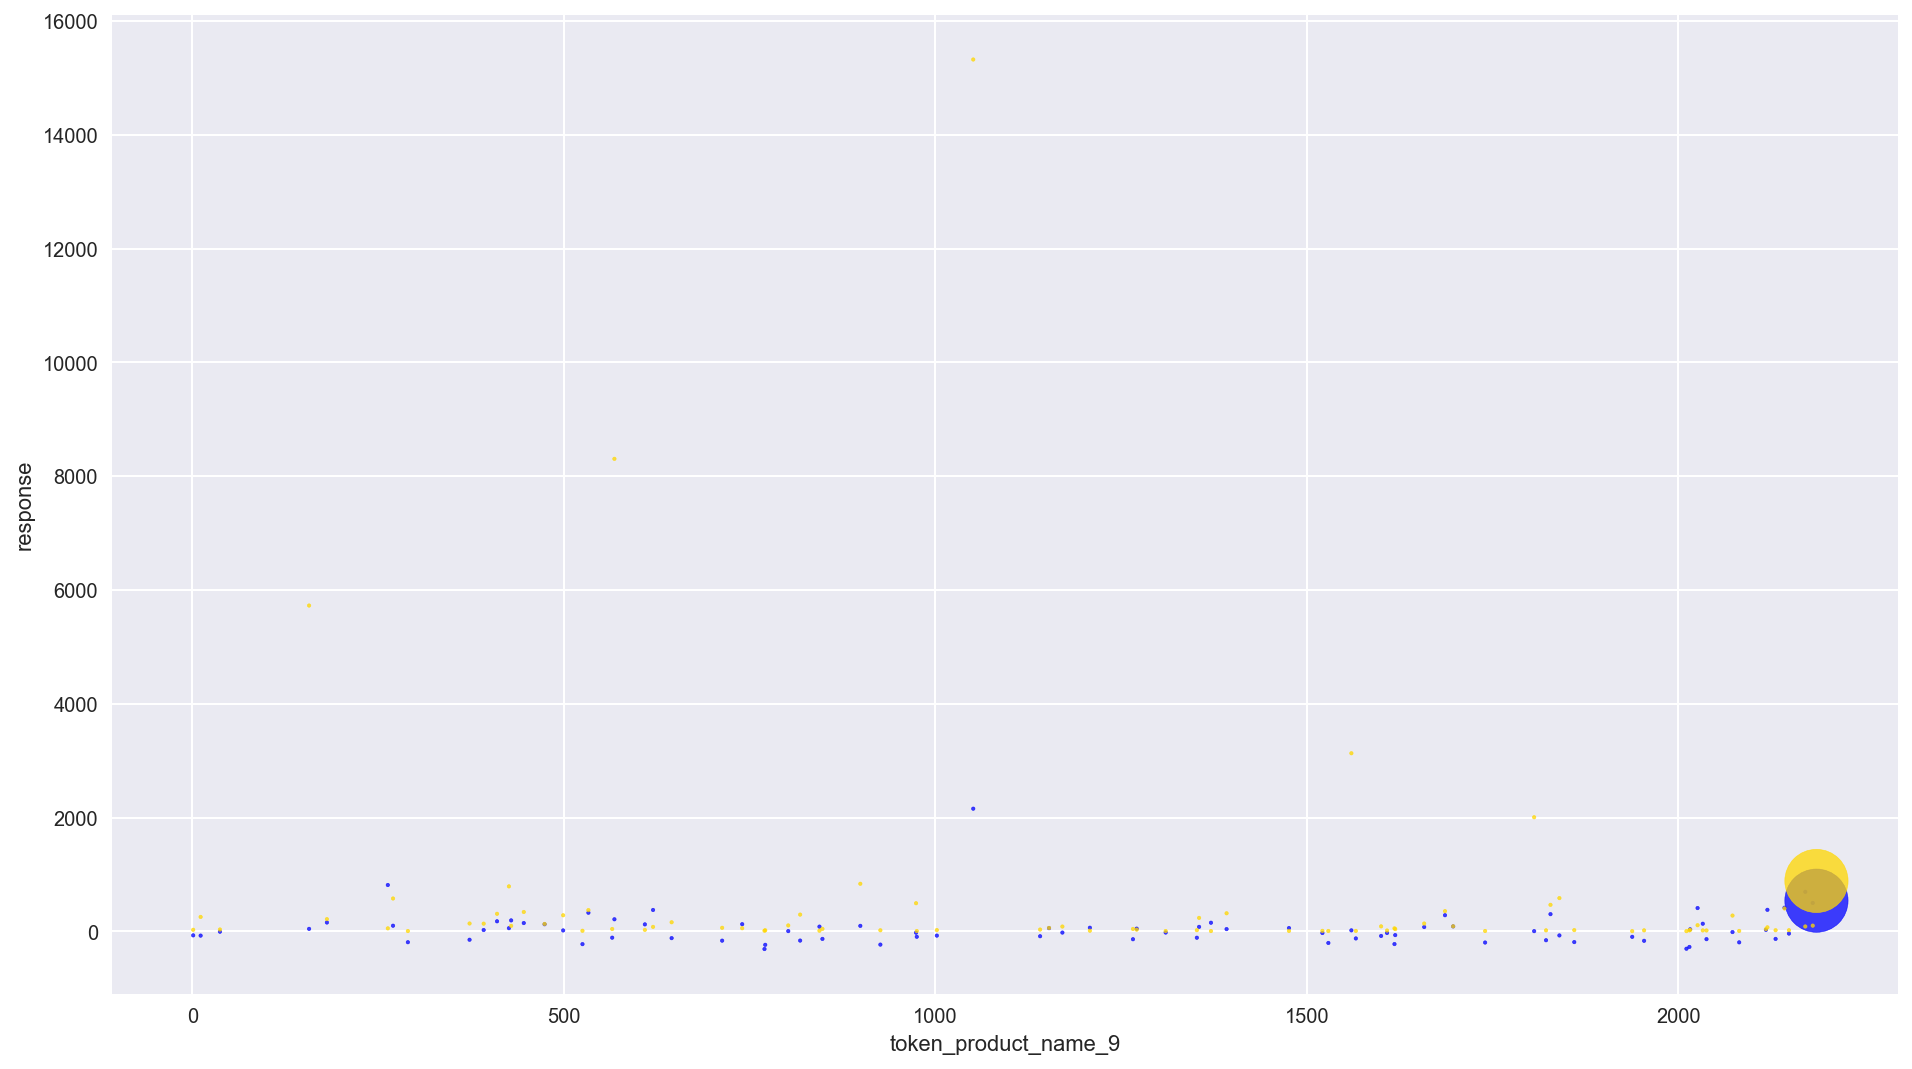

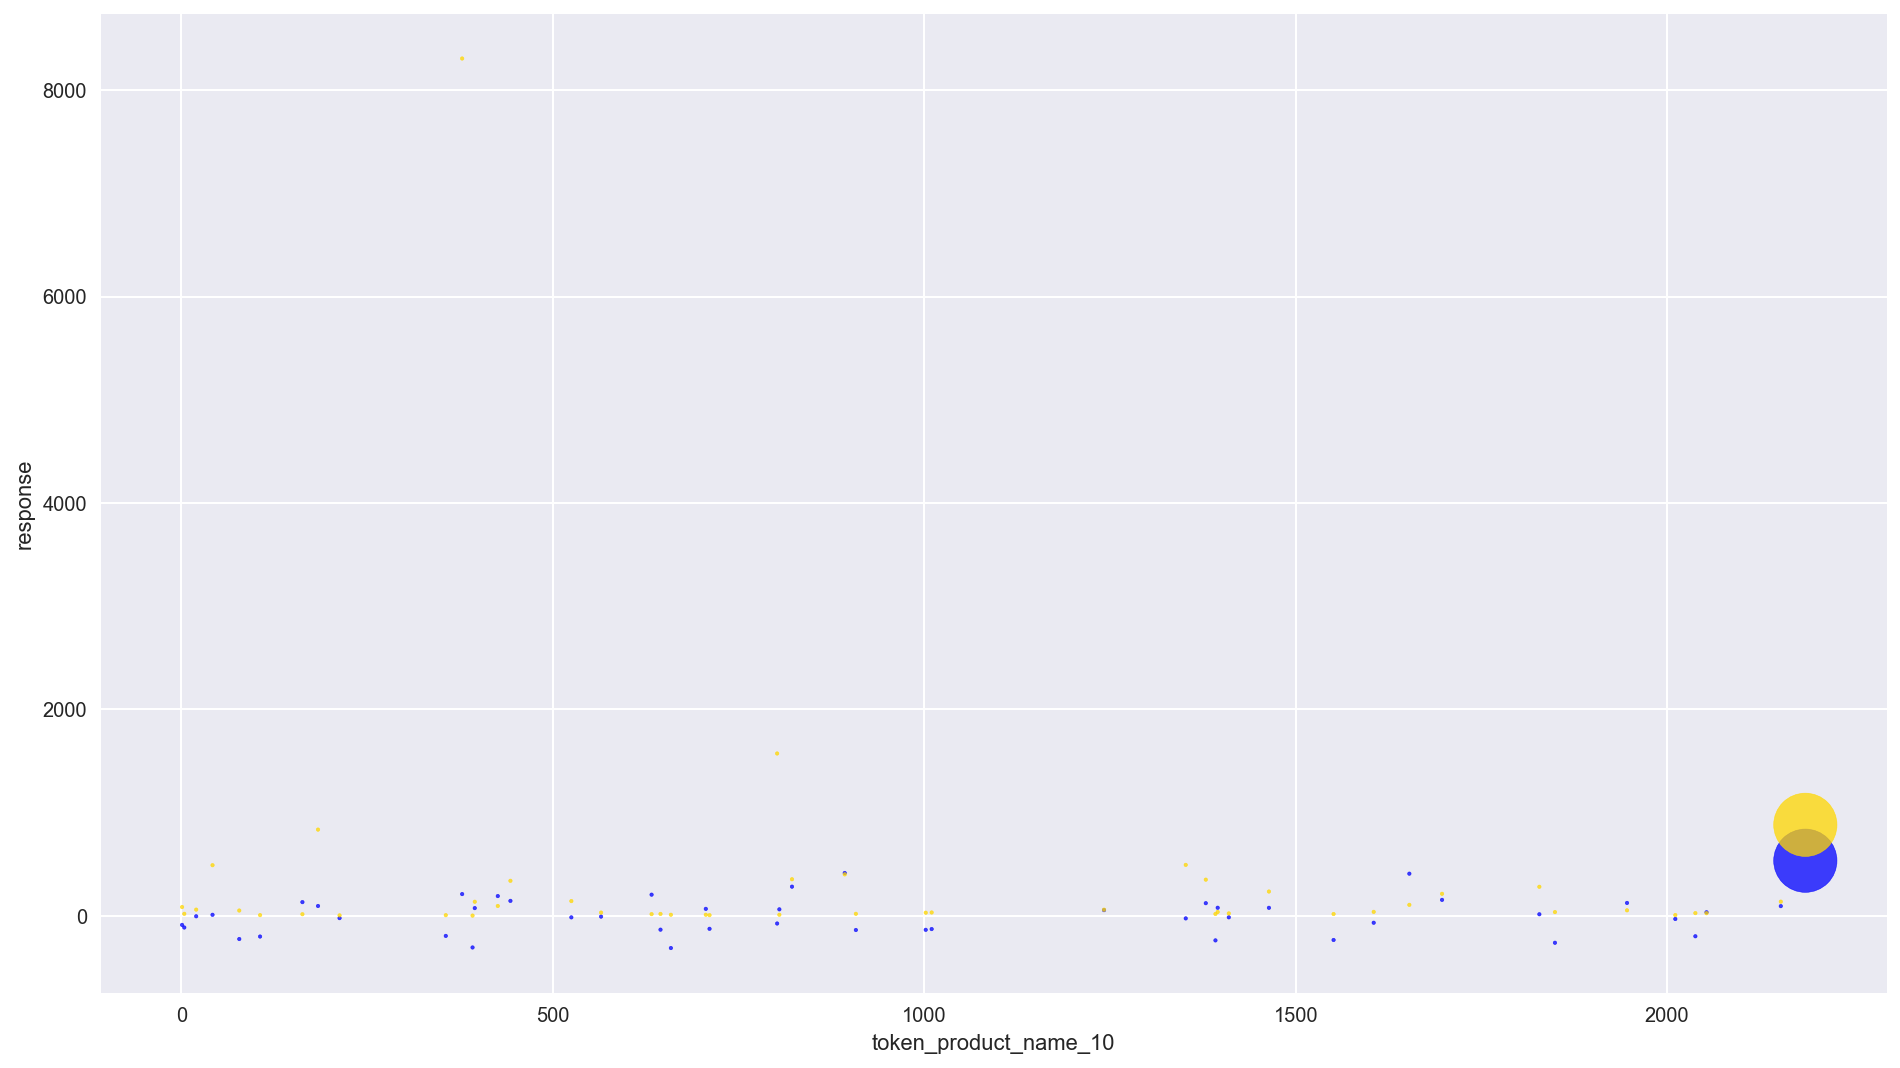

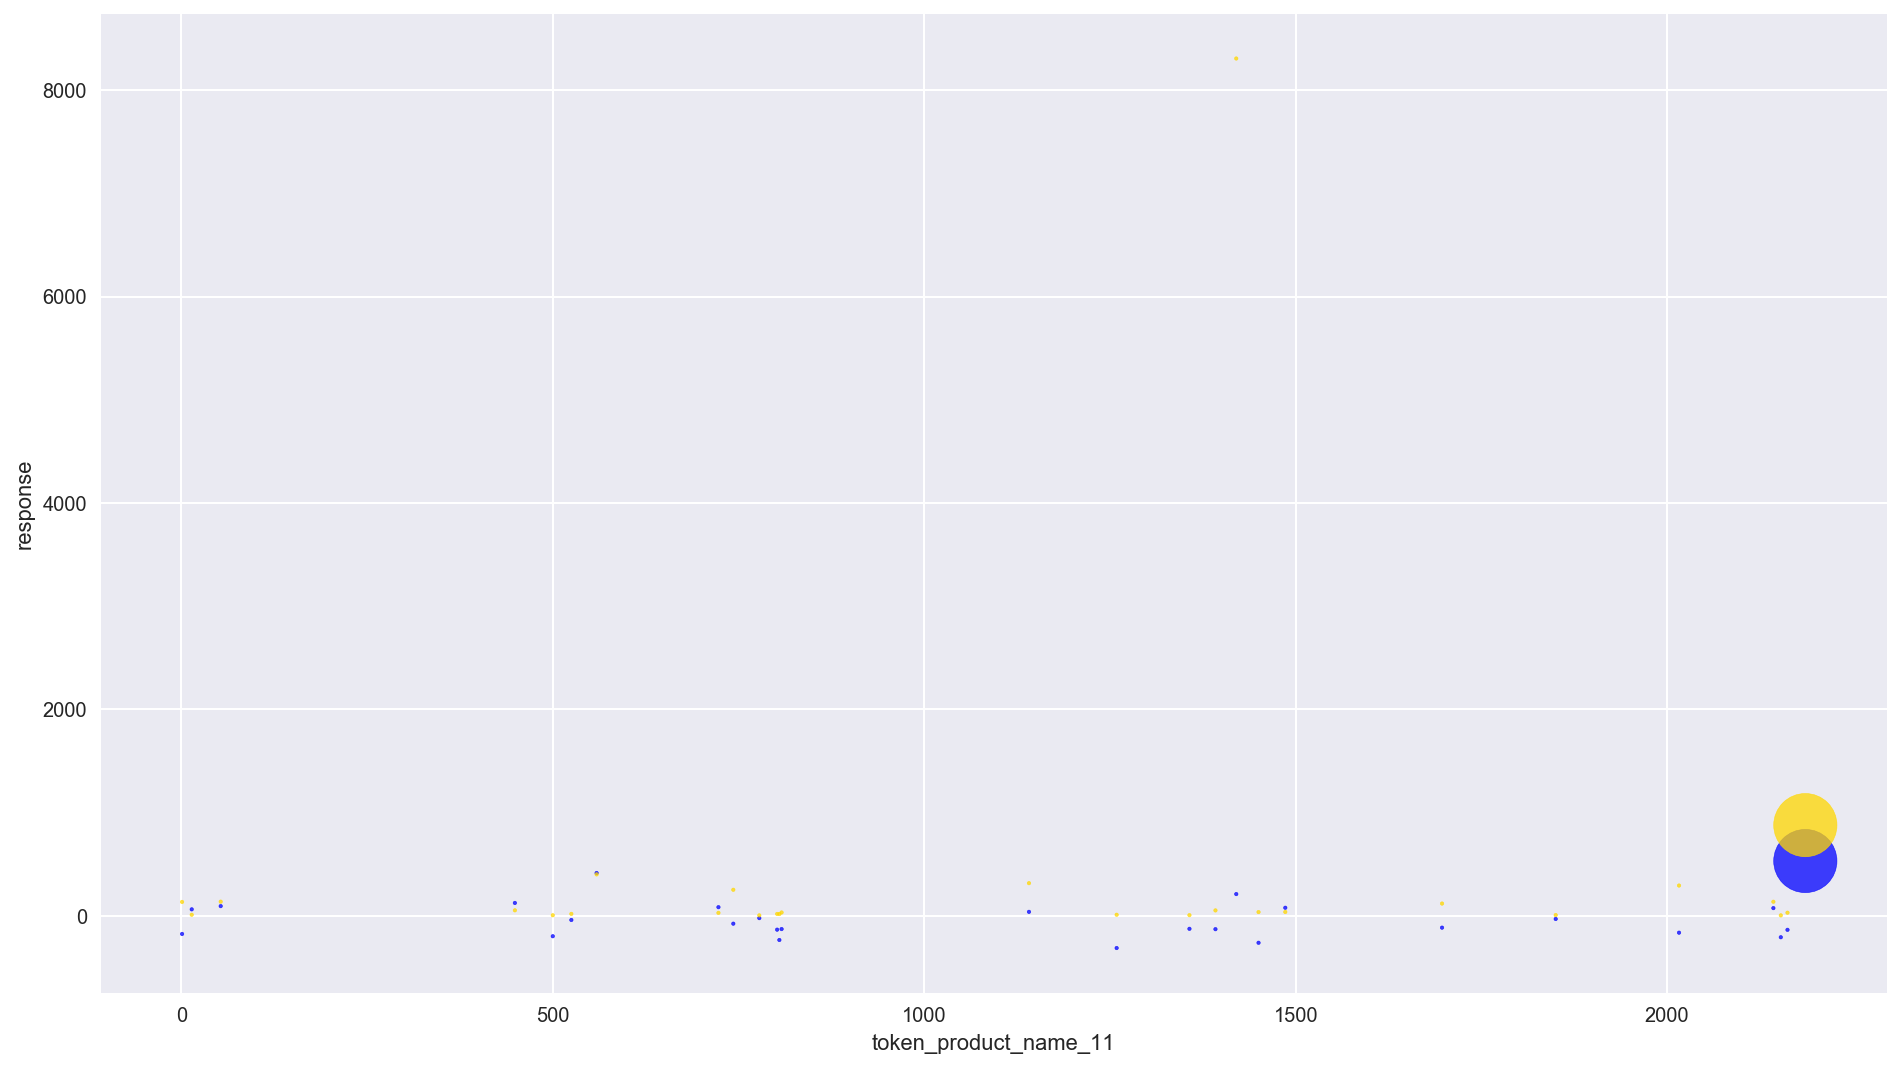

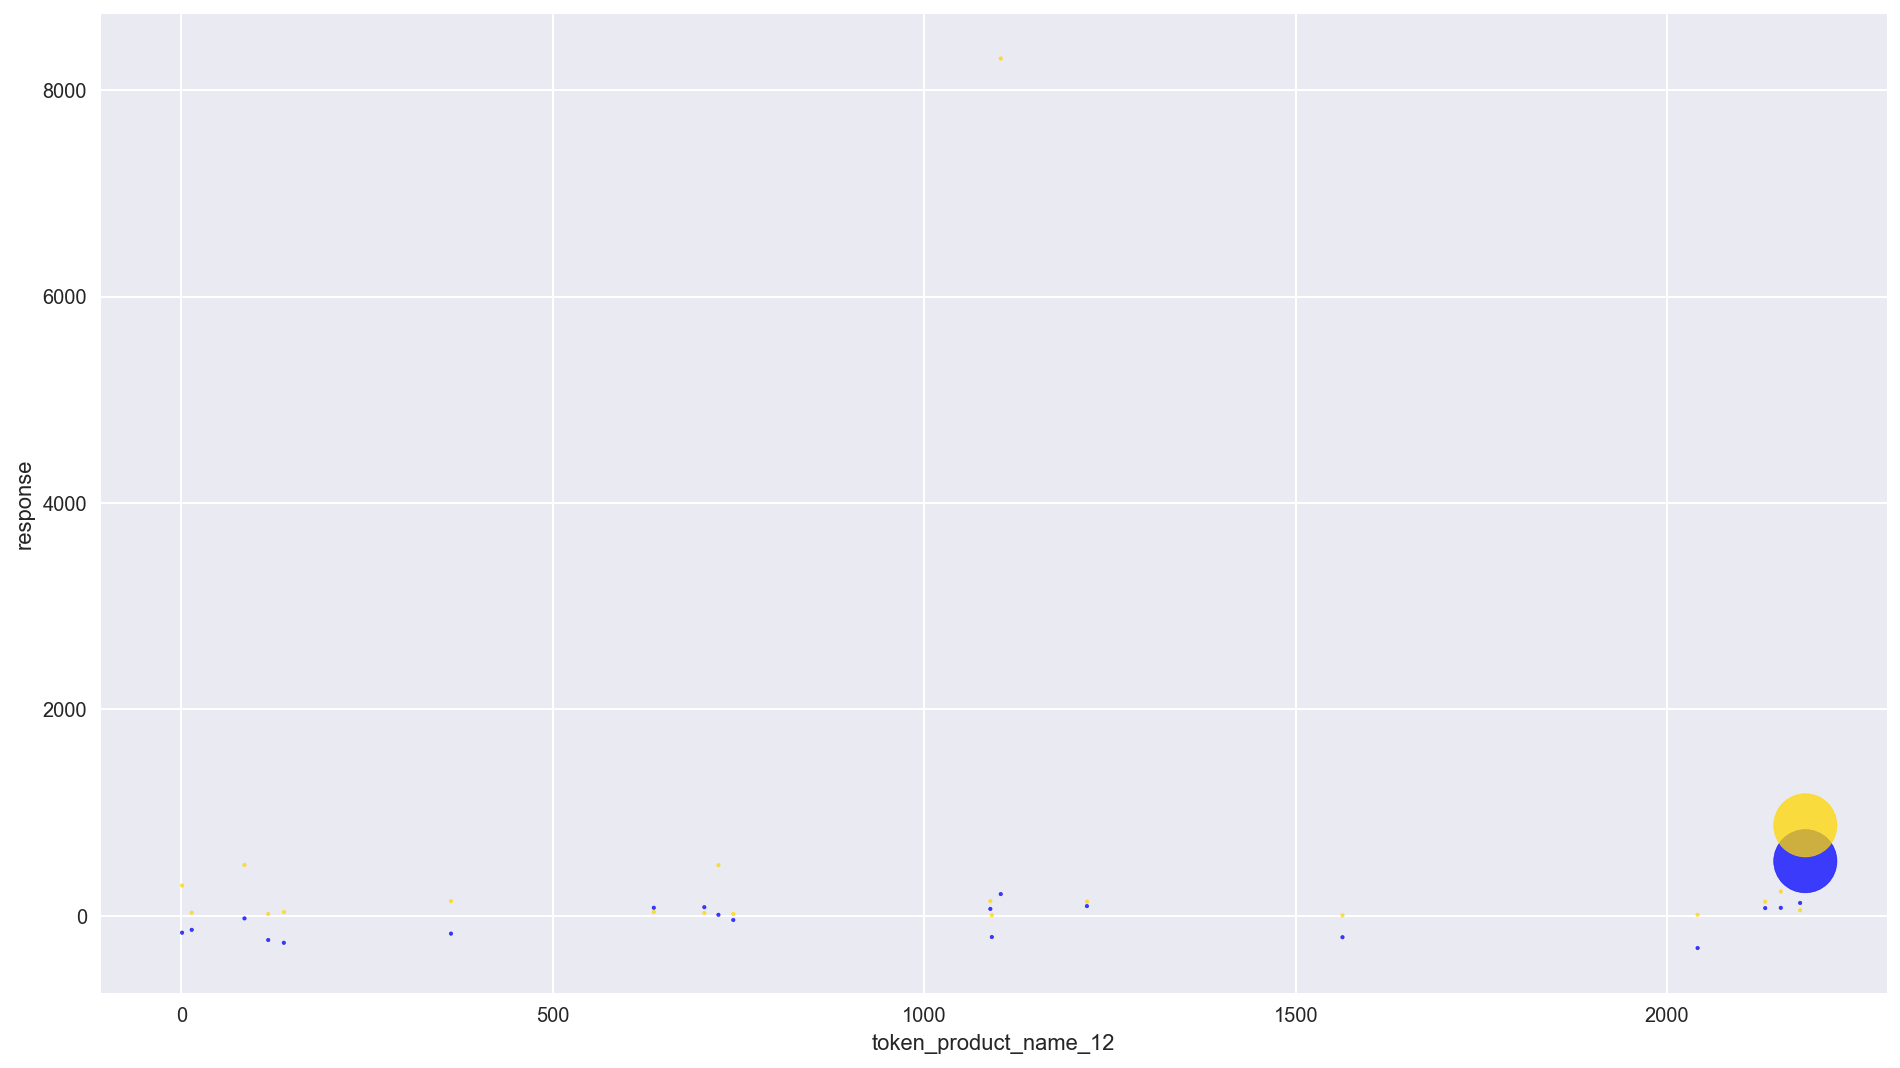

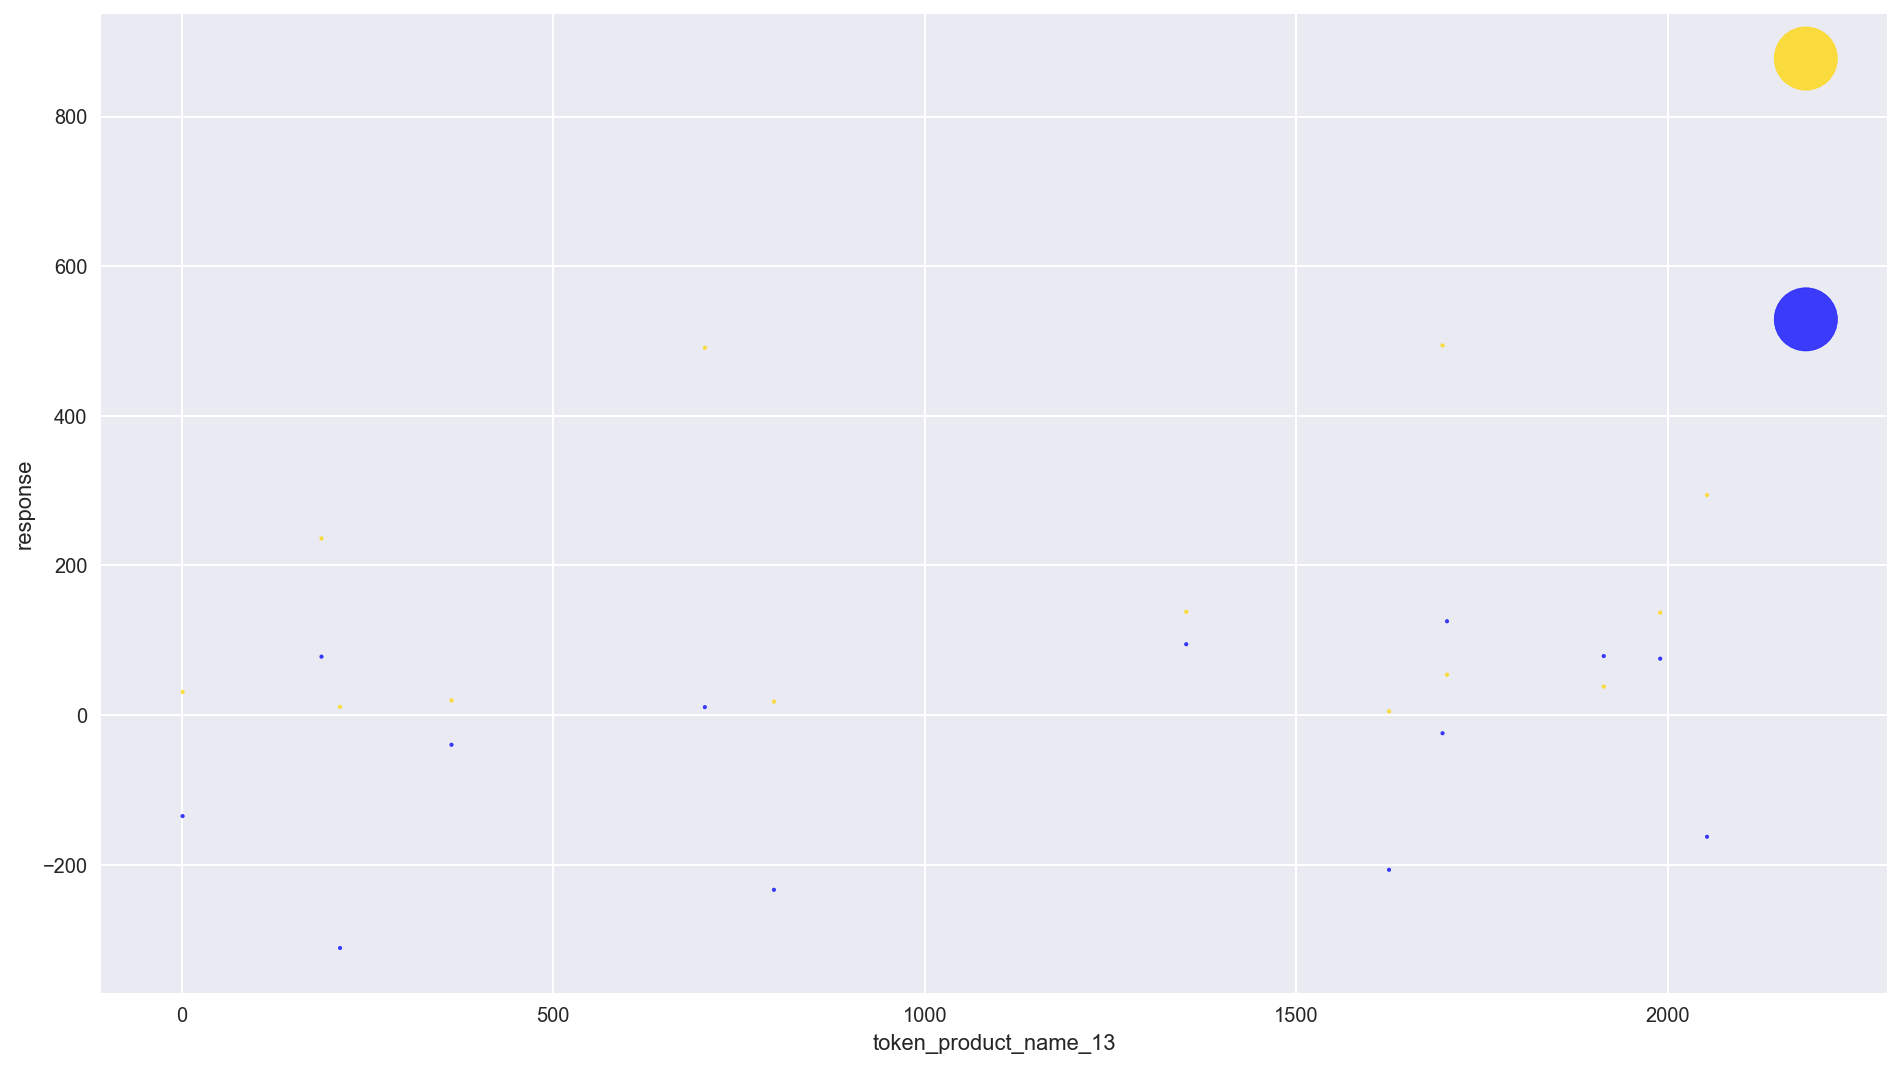

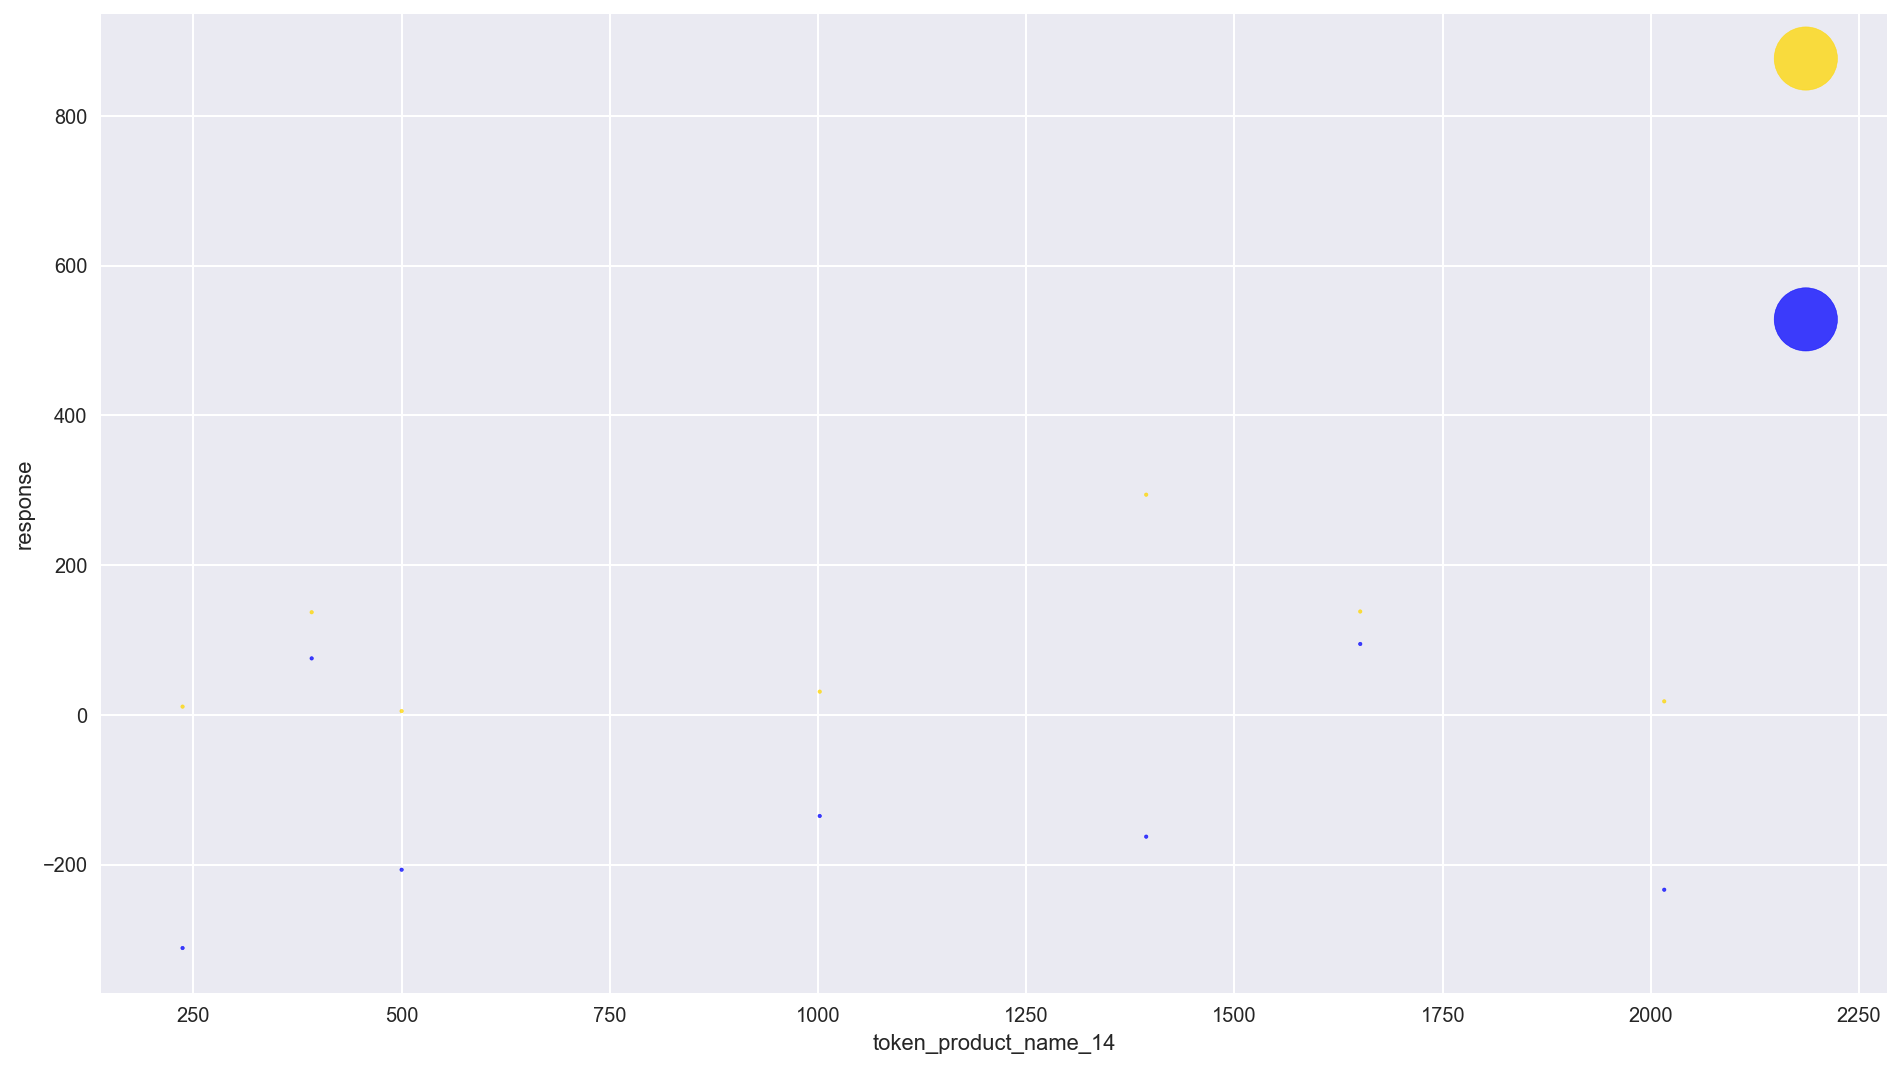

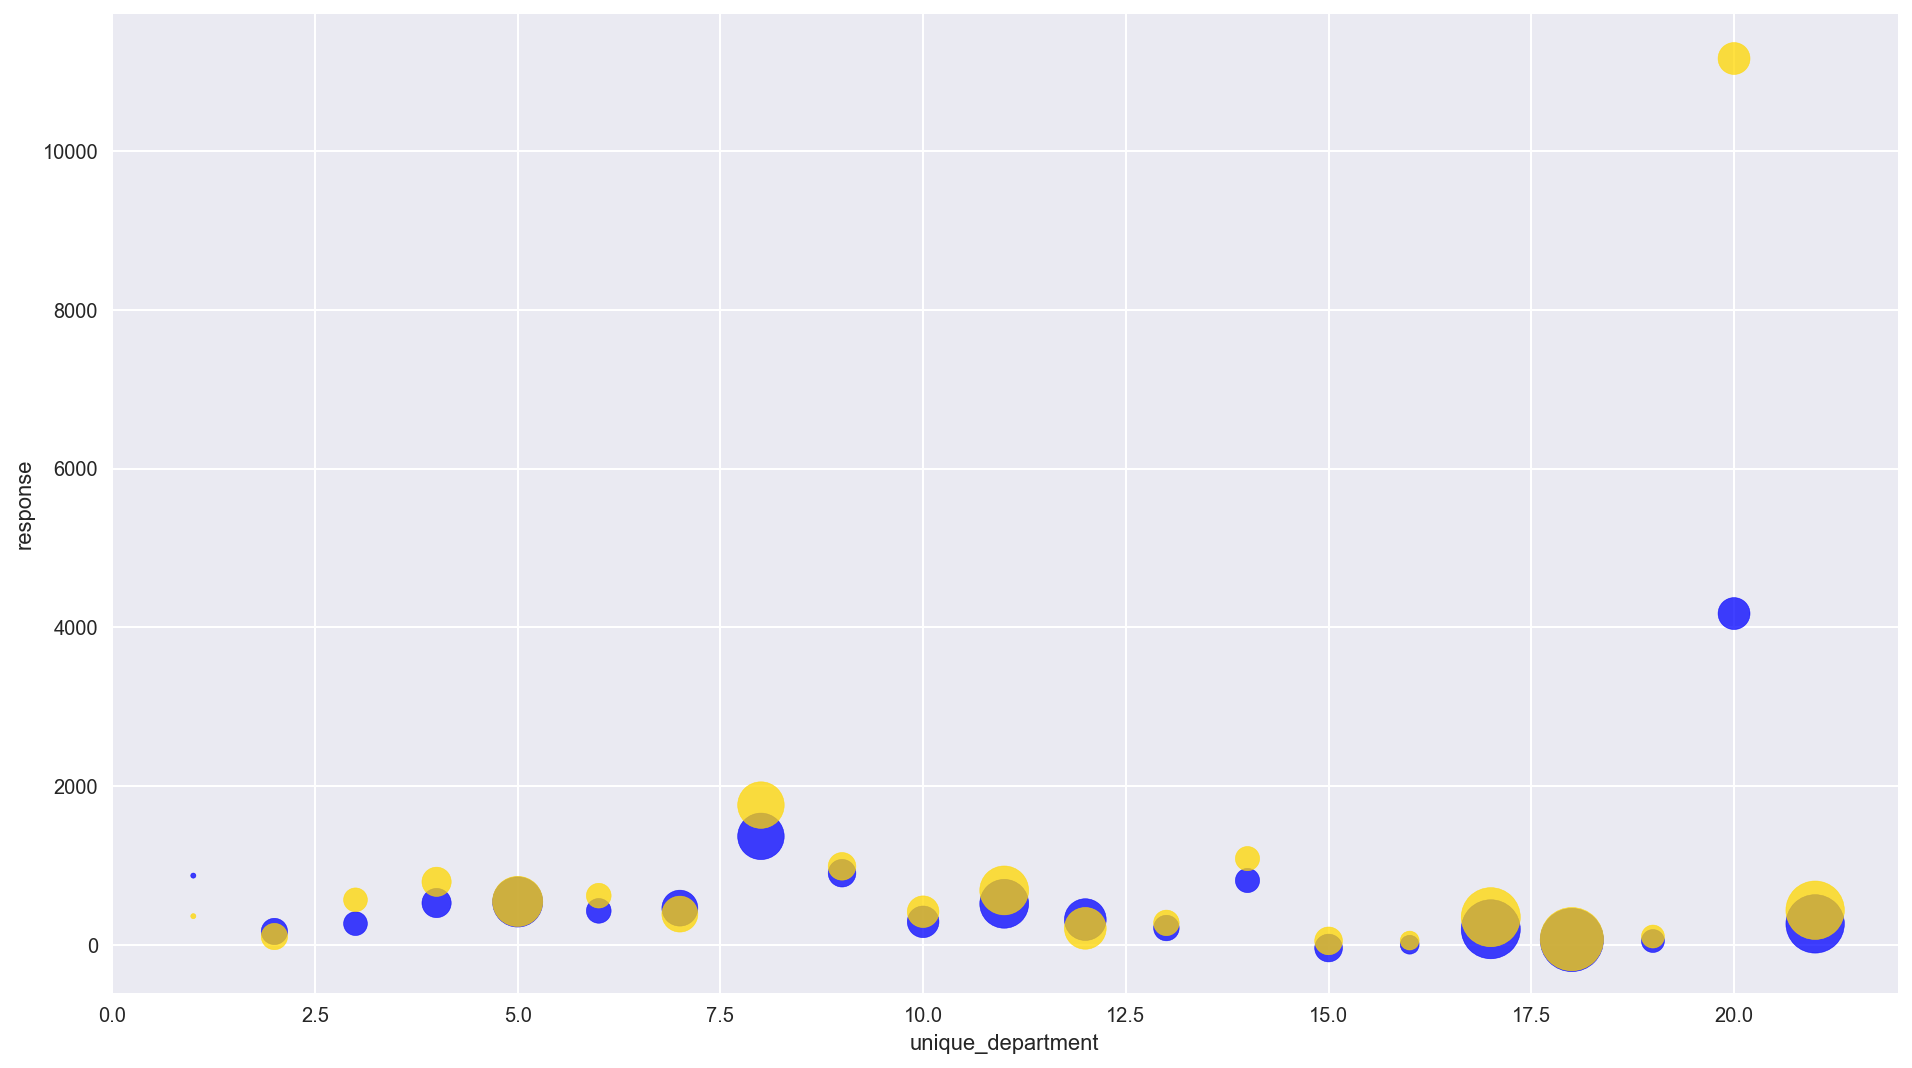

In [7]:

test = model.pipeline.encoded_test_data.x.copy()
test['response'] = model.pipeline.test_data[model.pipeline.output_encoder.column]
test['color'] = 'gold'

predict = model.pipeline.encoded_test_data.x.copy()
predict['response'] = model.predict(model.pipeline.test_data)
predict['color'] = 'blue'

data = test.append(predict)

def plot_encoder(name):
    stats = data.groupby(['color', name]).agg({'response': ['mean', 'size']}).reset_index()
    stats.columns = ['color', name, 'response', 'population']
    stats['population'] = (stats['population'] / stats['population'].max() * 1000).clip(lower=3)
    stats.plot.scatter(x=name, y='response', s=stats['population'], figsize=(16, 9), c=stats['color'], alpha=0.75)    

for encoder in model.pipeline.encoders:
    if hasattr(encoder, 'sequence_length'):
        for i in range(encoder.sequence_length):
            plot_encoder(encoder.sequence_name(i))
    else:
        plot_encoder(encoder.name)